In [5]:
!pip install torch

     ---------------------------------------- 0.0/172.4 MB ? eta -:--:--
     ---------------------------------------- 0.3/172.4 MB 7.9 MB/s eta 0:00:22
     ---------------------------------------- 0.6/172.4 MB 7.2 MB/s eta 0:00:24
     ---------------------------------------- 0.9/172.4 MB 6.9 MB/s eta 0:00:25
     ---------------------------------------- 1.2/172.4 MB 7.0 MB/s eta 0:00:25
     ---------------------------------------- 1.5/172.4 MB 7.0 MB/s eta 0:00:25
     ---------------------------------------- 1.8/172.4 MB 6.8 MB/s eta 0:00:25
     ---------------------------------------- 2.1/172.4 MB 6.8 MB/s eta 0:00:26
      --------------------------------------- 2.4/172.4 MB 6.8 MB/s eta 0:00:26
      --------------------------------------- 2.7/172.4 MB 6.7 MB/s eta 0:00:26
      --------------------------------------- 3.0/172.4 MB 6.7 MB/s eta 0:00:26
      --------------------------------------- 3.4/172.4 MB 6.7 MB/s eta 0:00:26
      --------------------------------------- 3

In [6]:
import pandas as pd
import torch
from torch.nn import Linear, Sequential, LeakyReLU, ReLU, SELU, GELU, Mish
from torch.utils.data import DataLoader
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

In [7]:
file_path = '../train_1.csv'

data = pd.read_csv(file_path)
data

,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,53.622535,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,53.979870,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,53.656268,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,53.639405,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,53.588771,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21188,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,43.202659,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21189,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,50.148287,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21190,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,5.405448,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21191,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,6.249958,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


In [8]:
X = data.iloc[:, 0:-1]
y = data.iloc[:, -1]

X.head()

,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,...,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
0,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,53.622535,...,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059
1,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,53.979870,...,2.00,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606
2,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,53.656268,...,2.25,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697
3,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,53.639405,...,2.25,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952
4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,53.588771,...,2.25,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0,
)

X_train.shape, X_test.shape

((16954, 80), (4239, 80))

In [10]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_sc= min_max_scaler.fit_transform(X_train)

X_test_sc=min_max_scaler.fit_transform(X_test)

In [11]:
scaler = MinMaxScaler()

y_train_sc = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_sc = scaler.transform(y_test.values.reshape(-1, 1))

In [12]:
# train-test split
dataloaders = {
    'train': DataLoader(
        list(zip(X_train_sc, y_train_sc)),
        batch_size=32
    ),
    'test': DataLoader(
        list(zip(X_test_sc, y_test_sc)),
        batch_size=32
    )
}

In [13]:
def train(model, dataloaders, lr, epochs):

    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    scheduler =torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=625)

    metrics = {'train' : {
        'mse_loss': [], 'mae_loss': [], 'mape_loss': [], 'r2_score': [], 'lr': [1]
        },
              'test' : {
                  'mse_loss': [], 'mae_loss': [], 'mape_loss': [], 'r2_score': [], 'lr': [1]
                  }
               }

    for epoch in range(epochs):
        for phase in ['train', 'test']:

            epoch_loss = 0.
            epoch_r2_score = 0.
            epoch_mae_loss = 0.
            epoch_mape_loss = 0.

            for x, y in dataloaders[phase]:

                y_pred = model(x.float())
                loss_value = criterion(y.float(), y_pred.squeeze(0))
                epoch_loss += loss_value.item()

                optimizer.zero_grad()

                if phase == 'train':
                    loss_value.backward()
                    optimizer.step()
                    scheduler.step(loss_value)

                y = y.detach().numpy()
                y_pred = y_pred.squeeze(0).detach().numpy()
                epoch_r2_score += r2_score(y, y_pred)
                epoch_mae_loss += mean_absolute_error(y, y_pred)
                epoch_mape_loss += mean_absolute_percentage_error(y, y_pred)

            metrics[phase]['mse_loss'].append(epoch_loss/len(dataloaders[phase]))
            metrics[phase]['r2_score'].append(epoch_r2_score/len(dataloaders[phase]))
            metrics[phase]['mae_loss'].append(epoch_mae_loss/len(dataloaders[phase]))
            metrics[phase]['mape_loss'].append(epoch_mape_loss/len(dataloaders[phase]))
            metrics[phase]['lr'].append(optimizer.param_groups[0]['lr'])

    return metrics


Проведём поиск наилучшей функции активации для данной архитектуры.

In [14]:
activ_funcs = [LeakyReLU, ReLU, SELU, GELU, Mish]
history = {}

for func in activ_funcs:

  model = Sequential(
              Linear(80, 256),
              func(),
              Linear(256, 512),
              func(),
              Linear(512, 256),
              func(),
              Linear(256, 64),
              func(),
              Linear(64, 1)
          )

  history[func.__name__] = train(model, dataloaders, 0.001, 15)

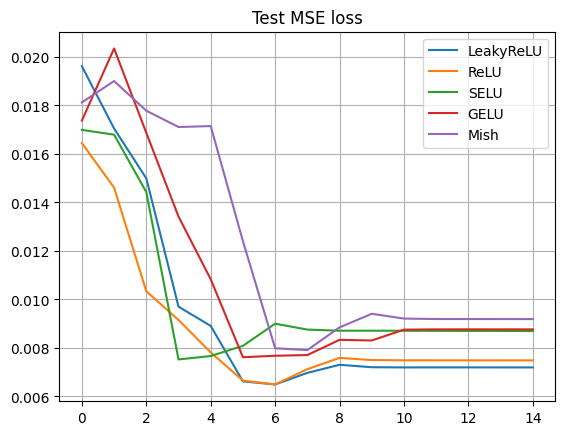

In [15]:
func_names = list(history.keys())

for func_name in func_names:
  plt.plot(range(15), history[func_name]['test']['mse_loss'])
plt.title('Test MSE loss')
plt.legend(func_names)
plt.grid(True)
plt.show()

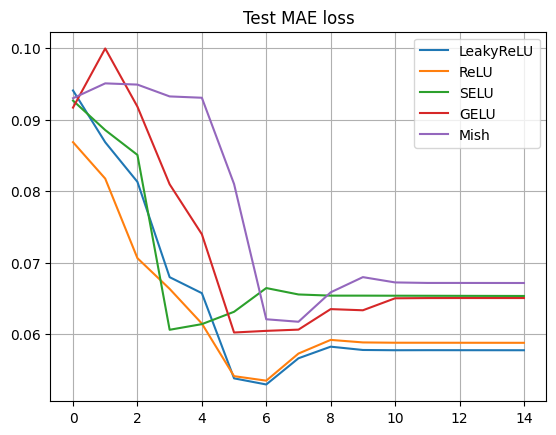

In [16]:
for func_name in func_names:
  plt.plot(range(15), history[func_name]['test']['mae_loss'])
plt.title('Test MAE loss')
plt.legend(func_names)
plt.grid(True)
plt.show()

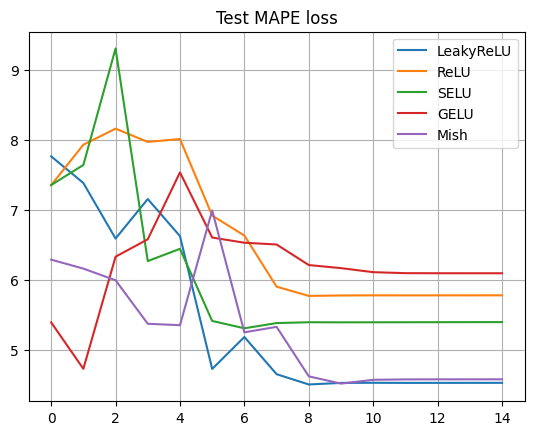

In [17]:
for func_name in func_names:
  plt.plot(range(15), history[func_name]['test']['mape_loss'])
plt.title('Test MAPE loss')
plt.legend(func_names)
plt.grid(True)
plt.show()

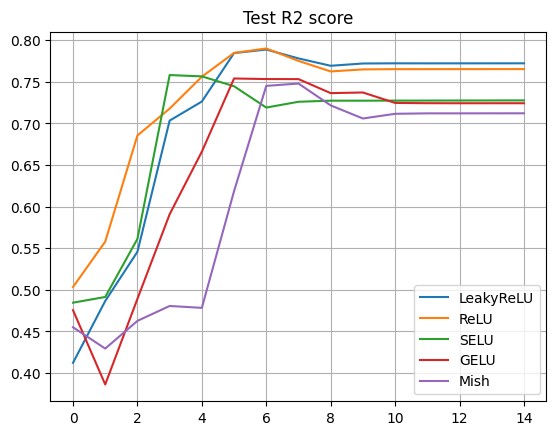

In [18]:
for func_name in func_names:
  plt.plot(range(15), history[func_name]['test']['r2_score'])
plt.title('Test R2 score')
plt.legend(func_names)
plt.grid(True)
plt.show()

Из графиков выше видно, что функция активации `LeakyReLU` дает наилучший результат в случае метрики MSE, MAE и R2. В случае метрики MAPE наилучшей функцией активации оказывается `Mish`.

In [19]:
def train(model, dataloaders, lr, epochs):
    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=625)

    metrics = {'train': {'mse_loss': [], 'mae_loss': [], 'mape_loss': [], 'r2_score': [], 'lr': [1]},
               'test': {'mse_loss': [], 'mae_loss': [], 'mape_loss': [], 'r2_score': [], 'lr': [1]}}

    for epoch in range(epochs):
        for phase in ['train', 'test']:
            epoch_loss = 0.
            epoch_r2_score = 0.
            epoch_mae_loss = 0.
            epoch_mape_loss = 0.

            for x, y in dataloaders[phase]:
                y_pred = model(x.float())
                loss_value = criterion(y.float(), y_pred.squeeze(0))
                epoch_loss += loss_value.item()

                optimizer.zero_grad()

                if phase == 'train':
                    loss_value.backward()
                    optimizer.step()
                    scheduler.step(loss_value)

                y = y.detach().numpy()
                y_pred = y_pred.squeeze(0).detach().numpy()
                epoch_r2_score += r2_score(y, y_pred)
                epoch_mae_loss += mean_absolute_error(y, y_pred)
                epoch_mape_loss += mean_absolute_percentage_error(y, y_pred)

            metrics[phase]['mse_loss'].append(epoch_loss/len(dataloaders[phase]))
            metrics[phase]['r2_score'].append(epoch_r2_score/len(dataloaders[phase]))
            metrics[phase]['mae_loss'].append(epoch_mae_loss/len(dataloaders[phase]))
            metrics[phase]['mape_loss'].append(epoch_mape_loss/len(dataloaders[phase]))
            metrics[phase]['lr'].append(optimizer.param_groups[0]['lr'])

    return metrics

# Определяем гиперпараметры
learning_rate = 0.001
num_epochs = 15

# Создаем модель с LeakyReLU
model = Sequential(
    Linear(80, 256),
    LeakyReLU(),
    Linear(256, 512),
    LeakyReLU(),
    Linear(512, 256),
    LeakyReLU(),
    Linear(256, 64),
    LeakyReLU(),
    Linear(64, 1)
)

# Объявляем dataloaders (замените на ваши данные)
dataloaders = {
    'train': DataLoader(list(zip(X_train_sc, y_train_sc)), batch_size=32),
    'test': DataLoader(list(zip(X_test_sc, y_test_sc)), batch_size=32)
}

# Обучаем модель и выводим результаты
metrics = train(model, dataloaders, learning_rate, num_epochs)
print("Results for LeakyReLU:")
print("MAPE:", metrics['test']['mape_loss'][-1])
print("MAE:", metrics['test']['mae_loss'][-1])
print("R2:", metrics['test']['r2_score'][-1])
print("MSE:", metrics['test']['mse_loss'][-1])

Results for LeakyReLU:
MAPE: 4.564366957038587
MAE: 0.05835067714307414
R2: 0.7617626759325724
MSE: 0.007524854297000438


In [21]:
import itertools

# Определяем возможные значения для тюнинга
learning_rates = [0.001, 0.01, 0.1]
num_epochs_list = [10, 15, 20]

best_metrics = None
best_lr = None
best_epochs = None

# Перебираем все комбинации гиперпараметров
for lr, num_epochs in itertools.product(learning_rates, num_epochs_list):
    model = Sequential(
        Linear(80, 256),
        LeakyReLU(),
        Linear(256, 512),
        LeakyReLU(),
        Linear(512, 256),
        LeakyReLU(),
        Linear(256, 64),
        LeakyReLU(),
        Linear(64, 1)
    )

    dataloaders = {
        'train': DataLoader(list(zip(X_train_sc, y_train_sc)), batch_size=32),
        'test': DataLoader(list(zip(X_test_sc, y_test_sc)), batch_size=32)
    }

    metrics = train(model, dataloaders, lr, num_epochs)
    
    # Сравниваем с текущим лучшими метриками
    if best_metrics is None or metrics['test']['mape_loss'][-1] < best_metrics['test']['mape_loss'][-1]:
        best_metrics = metrics
        best_lr = lr
        best_epochs = num_epochs

# Выводим лучшие параметры
print("Best Learning Rate:", best_lr)
print("Best Number of Epochs:", best_epochs)
print("Best MAPE:", best_metrics['test']['mape_loss'][-1])
print("Best MAE:", best_metrics['test']['mae_loss'][-1])
print("Best R2:", best_metrics['test']['r2_score'][-1])
print("Best MSE:", best_metrics['test']['mse_loss'][-1])


Best Learning Rate: 0.01
Best Number of Epochs: 10
Best MAPE: 4.728315655841729
Best MAE: 0.07493049866622675
Best R2: 0.6351520418420273
Best MSE: 0.011754446155286598


In [22]:
best_model = Sequential(
    Linear(80, 256),
    LeakyReLU(),
    Linear(256, 512),
    LeakyReLU(),
    Linear(512, 256),
    LeakyReLU(),
    Linear(256, 64),
    LeakyReLU(),
    Linear(64, 1)
)

best_dataloaders = {
    'train': DataLoader(list(zip(X_train_sc, y_train_sc)), batch_size=32),
    'test': DataLoader(list(zip(X_test_sc, y_test_sc)), batch_size=32)
}

best_metrics = train(best_model, best_dataloaders, best_lr, best_epochs)

# Выводим результаты с лучшими параметрами
print("Results for Best Parameters with LeakyReLU:")
print("MAPE:", best_metrics['test']['mape_loss'][-1])
print("MAE:", best_metrics['test']['mae_loss'][-1])
print("R2:", best_metrics['test']['r2_score'][-1])
print("MSE:", best_metrics['test']['mse_loss'][-1])

Results for Best Parameters with LeakyReLU:
MAPE: 7.113191283033075
MAE: 0.06738589885151633
R2: 0.7038049987163573
MSE: 0.009437034046627525


In [2]:
import pandas as pd

df_new = {
    'Metric': ['MAPE', 'MAE', 'R2'],
    'Value': [4.564366957038587, 0.05835067714307414, 0.7617626759325724]
}

df = pd.DataFrame(df_new)
df

,Metric,Value
0,MAPE,4.564367
1,MAE,0.058351
2,R2,0.761763
